# Import libraries

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import gaussian_filter
from functions import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": 17})
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=12)

# Read data from simulations

In [2]:
N=128      
pp = 2*np.pi;
Na=20
Lx=pp*(Na+1)
Ly=pp*(Na+1)
x = np.linspace(0,Lx,N,endpoint=True)
y = np.linspace(0,Ly,N,endpoint=True)
x=x-np.average(x)
y=y-np.average(y)
xm, ym = np.meshgrid(x, y)

In [3]:
folder=""
alpha=1.0;gamma=2.0;beta=0.5;sigma=0.1;eps=0.5;
times = np.arange(0,4000,1000)
dt=0.1
psi = []
theta = []
for time in times:
    psi.append(np.load(folder+"DIP_a"+str(alpha)+"_b"+str(beta)+"_g"+str(gamma)+"_s"+str(sigma)+"_e"+str(eps)+"_Na"+str(Na)+"/u"+str(time)+".npy"))
    theta.append(np.load(folder+"DIP_a"+str(alpha)+"_b"+str(beta)+"_g"+str(gamma)+"_s"+str(sigma)+"_e"+str(eps)+"_Na"+str(Na)+"/theta"+str(time)+".npy"))   

In [4]:
psi = np.array(psi)
theta = np.array(theta) 

In [5]:
path = folder +"DIP_a"+str(alpha)+"_b"+str(beta)+"_g"+str(gamma)+"_s"+str(sigma)+"_e"+str(eps)+"_Na"+str(Na)
fname = path +"DIP_a"+str(alpha)+"_b"+str(beta)+"_g"+str(gamma)+"_s"+str(sigma)+"_e"+str(eps)+"_Na"+str(Na)+"_ave"
print(fname)

DIP_a1.0_b0.5_g2.0_s0.1_e0.5_Na20DIP_a1.0_b0.5_g2.0_s0.1_e0.5_Na20_ave


# Plot data

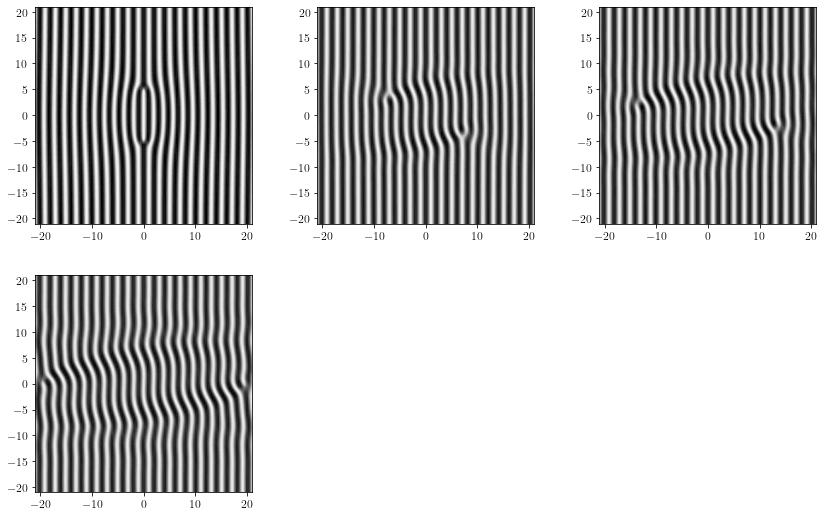

In [6]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(331,adjustable='box', aspect=1.0)
ax2 = plt.subplot(332,adjustable='box', aspect=1.0)
ax3 = plt.subplot(333,adjustable='box', aspect=1.0)
ax4 = plt.subplot(334,adjustable='box', aspect=1.0)
# ax5 = plt.subplot(335,adjustable='box', aspect=1.0)
# ax6 = plt.subplot(336,adjustable='box', aspect=1.0)

    
#Plot 1
ax1.contourf(xm/np.pi,ym/np.pi,psi[0],50,cmap='Greys')
ax2.contourf(xm/np.pi,ym/np.pi,psi[1],50,cmap='Greys')
ax3.contourf(xm/np.pi,ym/np.pi,psi[2],50,cmap='Greys')
ax4.contourf(xm/np.pi,ym/np.pi,psi[3],50,cmap='Greys')
# ax5.contourf(xm/np.pi,ym/np.pi,psi[4],50,cmap='Greys')
# ax6.contourf(xm/np.pi,ym/np.pi,psi[5],50,cmap='Greys')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)#, hspace=0.2)

# Calculate difference image

In [7]:
xmcd_crop = psi.copy()
xmcd_crop.shape

(4, 128, 128)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Reds"))


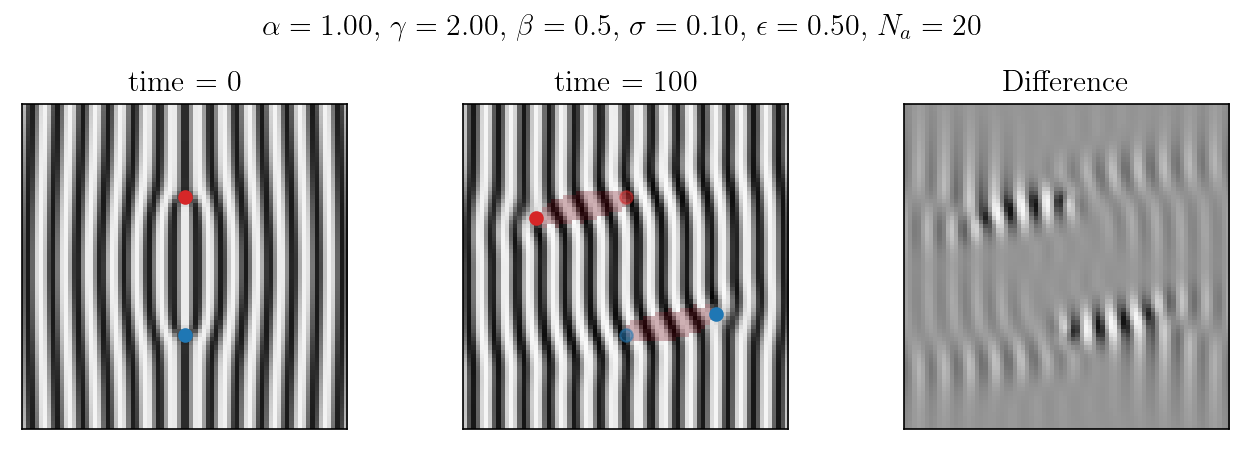

In [8]:
i1 = 0
i2 = 1
crop1 = 25
crop2 = 25
nplot = 100
plt.figure(figsize=(9,3), dpi=150)
plt.suptitle('$\\alpha=%.2lf$, $\\gamma=%.2lf$, $\\beta=%.1lf$, $\\sigma=%.2lf$, $\\epsilon=%.2lf$, $N_a=%d$ ' %
          (alpha,gamma,beta,sigma,eps,Na))
plt.subplot(131)
plt.title('time = '+"{:.0f}".format(i1*nplot))
plt.imshow(xmcd_crop[i1,crop1:-crop2,crop1:-crop2],cmap='Greys',vmin=-1,vmax=1,origin='lower')
plt.scatter(Lx//2-1.5-crop1,Lx//2+15-crop2, color='tab:red')
plt.scatter(Lx//2-1.5-crop1,Lx//2-18-crop2, color='tab:blue')
# plt.colorbar(label='$\psi$')
plt.xticks(())
plt.yticks(())
plt.subplot(132)
plt.title('time = '+"{:.0f}".format(i2*nplot))
plt.imshow(xmcd_crop[i2,crop1:-crop2,crop1:-crop2],cmap='Greys',vmin=-1,vmax=1,origin='lower')
mask = gaussian_filter(1.*(((xmcd_crop[i1] - xmcd_crop[i2])*(xmcd_crop[i1] - xmcd_crop[i2]))[crop1:-crop1,crop2:-crop2] > 1.5),1) > 0.1
z = np.ma.masked_array(mask, mask < 0.1)
cmap = plt.get_cmap('Reds')
cmap.set_under('white')
plt.imshow(z,cmap=cmap,origin='lower',alpha=0.3,vmin=0.5,vmax=0.8)
plt.scatter(Lx//2-1.5-crop1,Lx//2+15-crop2, color='tab:red', alpha=0.5)
plt.scatter(Lx//2-1.5-crop1,Lx//2-18-crop2, color='tab:blue', alpha=0.5)
plt.scatter(Lx//2-23-crop1,Lx//2+10-crop2, color='tab:red')
plt.scatter(Lx//2+20-crop1,Lx//2-13-crop2, color='tab:blue')
# plt.colorbar(label='$\psi$')
plt.xticks(())
plt.yticks(())
plt.subplot(133)
plt.title('Difference')
plt.imshow(xmcd_crop[i1,crop1:-crop2,crop1:-crop2] - xmcd_crop[i2,crop1:-crop2,crop1:-crop2],vmin=-2,vmax=2,cmap='Greys',origin='lower')
# plt.colorbar()
plt.xticks(())
plt.yticks(())
plt.tight_layout() 

## Every difference image

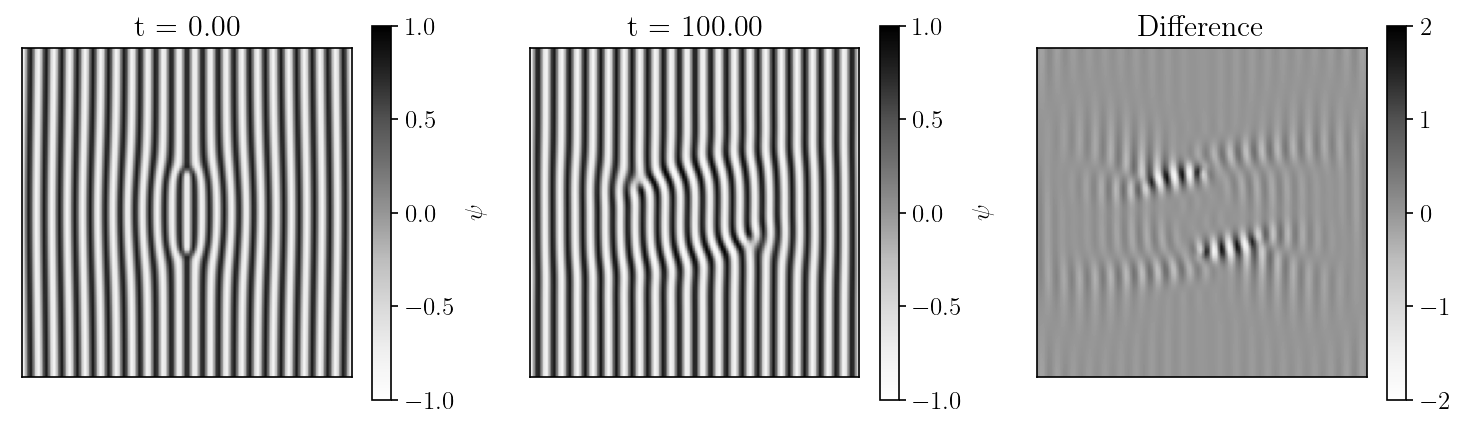

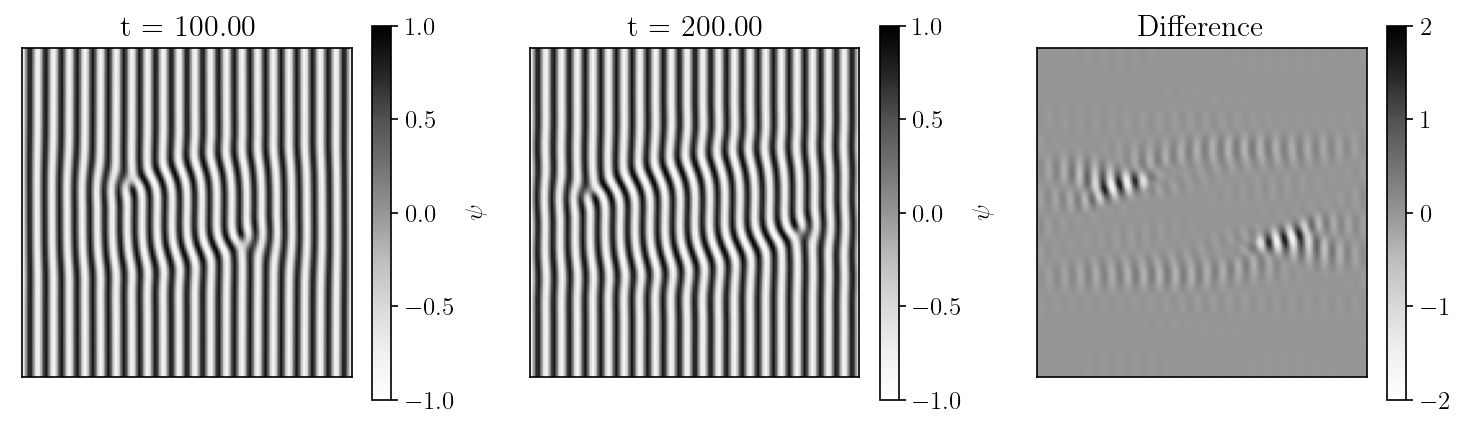

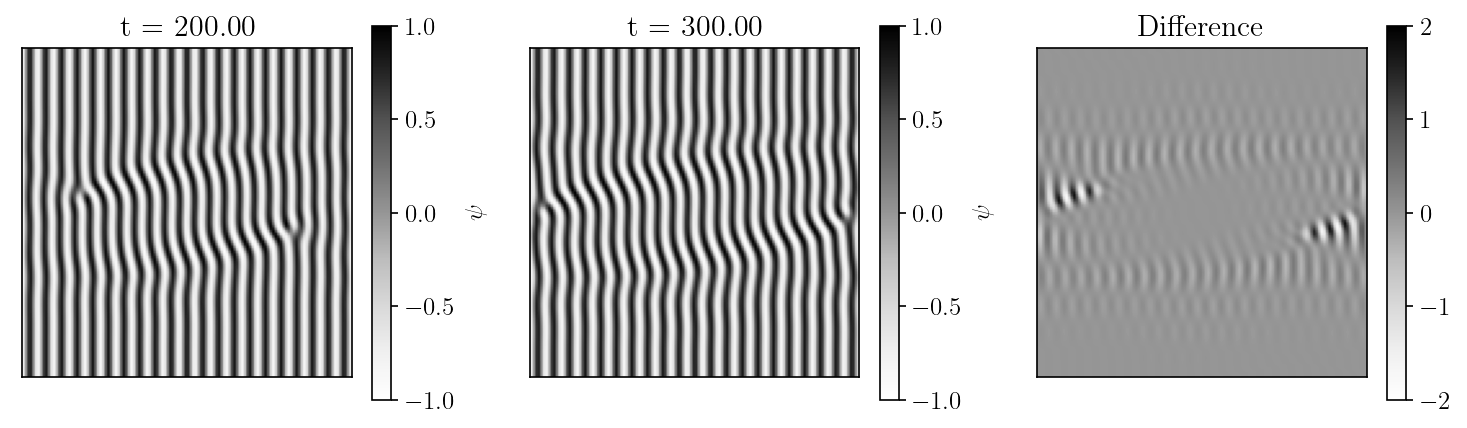

In [9]:
every = 1
ini = 0
nplot = 100
for i in np.arange(ini,xmcd_crop.shape[0]-every):
    i1 = i
    i2 = i1 + every
    plt.figure(figsize=(10,3), dpi=150)
    plt.subplot(131)
    plt.title('t = '+"{:.2f}".format(i1*nplot))
    plt.imshow(xmcd_crop[i1],cmap='Greys',vmin=-1,vmax=1,origin='lower')
    plt.colorbar(label='$\psi$')
    plt.xticks(())
    plt.yticks(())
    plt.subplot(132)
    plt.title('t = '+"{:.2f}".format(i2*nplot))
    plt.imshow(xmcd_crop[i2],cmap='Greys',vmin=-1,vmax=1,origin='lower')
    plt.colorbar(label='$\psi$')
    plt.xticks(())
    plt.yticks(())
    plt.subplot(133)
    plt.title('Difference')
    plt.imshow(xmcd_crop[i1] - xmcd_crop[i2],vmin=-2,vmax=2,cmap='Greys',origin='lower')
    plt.colorbar()
    plt.xticks(())
    plt.yticks(())
    plt.tight_layout()